<a href="https://colab.research.google.com/github/SankaranarayananA/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize


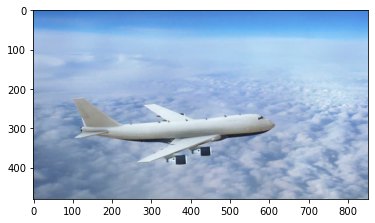

In [ ]:
# Displaying the image
img1 = plt.imread('content/Aeroplanes/1.jpg')
plt.imshow(img1)

In [ ]:
img1.shape

(480, 852, 3)

In [ ]:
import os
import numpy as np
datadir = 'content'

categories = ['Aeroplanes','Helicopters'] # Name the folder with these categories
target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # plt.imshow(img_array)
    # plt.show()
    img_resize = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)

In [ ]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.000000,0.301961,0.560784,0.000000,0.303451,0.562275,0.000000,0.301961,0.560784,0.000000,...,0.082353,0.407843,0.680863,0.078431,0.407843,0.678431,0.078431,0.407843,0.670588,Aeroplanes
1,0.000000,0.317647,0.537255,0.000000,0.317647,0.537255,0.000000,0.317647,0.537255,0.003922,...,0.665595,0.772549,0.859804,0.669704,0.776122,0.866318,0.676033,0.776712,0.867203,Aeroplanes
2,0.894118,0.895329,0.934545,0.898145,0.901580,0.941165,0.909693,0.912333,0.933725,0.913333,...,0.662418,0.689869,0.803203,0.628471,0.663647,0.777478,0.601739,0.643529,0.761176,Aeroplanes
3,0.250980,0.459216,0.772941,0.247059,0.455294,0.772941,0.244588,0.455294,0.772941,0.235686,...,0.585608,0.655412,0.753451,0.583529,0.654502,0.740784,0.576471,0.647059,0.737514,Aeroplanes
4,0.173974,0.350444,0.515150,0.172549,0.349020,0.513725,0.172549,0.349020,0.513725,0.172549,...,0.789778,0.797621,0.753830,0.817359,0.825203,0.782065,0.820175,0.828018,0.784881,Aeroplanes


In [ ]:
x = flat_data
y = target

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,stratify=y)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
model = SVC()
param = {
    'kernel':['linear','poly','rbf'],
    'C':[0.001,0.01,0.1,1,10]
}
grid = GridSearchCV(model,param, cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [ ]:
from sklearn.svm import SVC
model = SVC(C=0.01,kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.7096774193548387

In [ ]:
confusion_matrix(y_pred,y_test)

array([[11,  4],
       [ 5, 11]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Aeroplanes       0.73      0.69      0.71        16
 Helicopters       0.69      0.73      0.71        15

    accuracy                           0.71        31
   macro avg       0.71      0.71      0.71        31
weighted avg       0.71      0.71      0.71        31



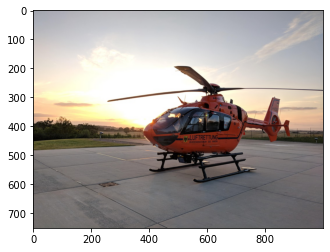

In [ ]:
img = plt.imread('heli.jpg')
plt.imshow(img)

In [ ]:
  img_array = imread('heli.jpg')
img_resize = resize(img_array,(150,150,3)) 


In [ ]:
img_resize = np.ndarray.flatten(img_resize)

In [ ]:
model.predict(img_resize.reshape(1,-1))

array(['Helicopters'], dtype='<U11')